## Distribuição de votos para Governador por cidade no Estado do Paraná

In [1]:
# Importando classes e métodos que serão utilizadas durante a execução
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline
# Como iremos trabalhar com o DF com bastante colunas o pandas poderá limitar a quantidade exibida, vamos alterar
pd.set_option('display.max_columns', None)

### Dados do Mapa

In [2]:
# Carregando o shapefile do PR
map_pr = gpd.read_file('../pr_municipios/41MUE250GC_SIR.shp');
map_pr

,NM_MUNICIP,CD_GEOCMU,geometry
0,ALTAMIRA DO PARANÁ,4100459,"POLYGON ((-52.70392 -24.74753, -52.70253 -24.7..."
1,ALTÔNIA,4100509,"POLYGON ((-53.76888 -23.81771, -53.77025 -23.8..."
2,ALTO PARANÁ,4100608,"POLYGON ((-52.27021 -22.91395, -52.26997 -22.9..."
3,ALTO PIQUIRI,4100707,"POLYGON ((-53.32098 -24.09160, -53.32456 -24.0..."
4,AMAPORÃ,4100905,"POLYGON ((-52.71519 -23.05869, -52.71628 -23.0..."
...,...,...,...
394,RIO BOM,4122107,"POLYGON ((-51.43628 -23.70882, -51.43571 -23.7..."
395,RIO BRANCO DO IVAÍ,4122172,"POLYGON ((-51.34454 -24.25018, -51.34345 -24.2..."
396,ROLÂNDIA,4122404,"POLYGON ((-51.30750 -23.17568, -51.30687 -23.1..."
397,TURVO,4127965,"POLYGON ((-51.37993 -24.76219, -51.37904 -24.7..."


In [3]:
map_pr.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NM_MUNICIP  399 non-null    object  
 1   CD_GEOCMU   399 non-null    object  
 2   geometry    399 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 9.5+ KB


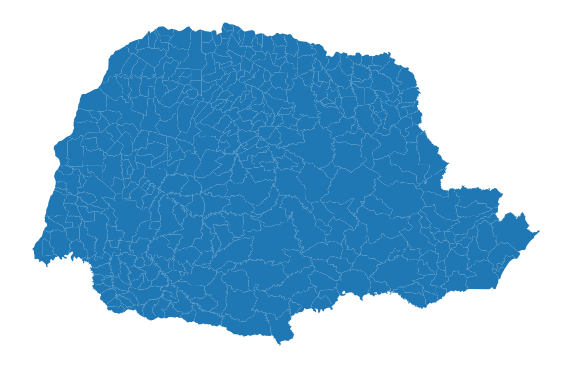

In [4]:
# Imprimindo um mapa do estado com todos os municipios
fig, ax = plt.subplots(1, figsize=(10,10))
map_pr.plot(ax=ax)
ax.set_axis_off()
plt.show()

### Dados da eleição

In [5]:
# Importando dados da eleição no PR
df_pr = pd.read_csv("../CSV-TSE/votacao_candidato_munzona_2018_PR.csv",sep=";", encoding='latin1')
df_pr.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
0,14/04/2020,19:37:32,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,PR,PR,PARANÁ,78719,SÃO JOÃO,151,6,Deputado Federal,160000621767,1544,CASSIO BADARÓ DA SILVEIRA PINTO,CÁSSIO BADARÓ,#NULO#,12,APTO,2,DEFERIDO,Coligação,15,MDB,Movimento Democrático Brasileiro,160000050570,"COLIGAÇÃO PARANÁ, EDUCAÇÃO E EMPREGO",MDB / PDT / SOLIDARIEDADE / PC do B,5,SUPLENTE,N,0
1,14/04/2020,19:37:32,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,PR,PR,PARANÁ,77232,NOVA FÁTIMA,108,6,Deputado Federal,160000623144,4070,LEOPOLDO COSTA MEYER,LEOPOLDO MEYER,#NULO#,12,APTO,2,DEFERIDO,Coligação,40,PSB,Partido Socialista Brasileiro,160000050618,PARANA FORTE,PP / PTB / DEM / PMN / PMB / PSB / PSDB / PROS,5,SUPLENTE,N,0
2,14/04/2020,19:37:32,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,PR,PR,PARANÁ,74292,ARAPOTI,164,7,Deputado Estadual,160000626056,17277,ROGERIO DA SILVA NASCIMENTO,ROGERIO CREDENCE,#NULO#,12,APTO,2,DEFERIDO,Coligação,17,PSL,Partido Social Liberal,160000050709,ENDIREITA PARANÁ,PSL / PTC / PATRI,5,SUPLENTE,N,1
3,14/04/2020,19:37:32,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,PR,PR,PARANÁ,79995,SÃO JORGE DO PATROCÍNIO,123,7,Deputado Estadual,160000612510,15123,MARCOS VINICIOS KLOSTER,PROFESSOR MARCOS KLOSTER,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,15,MDB,Movimento Democrático Brasileiro,160000050337,PARTIDO ISOLADO,MDB,5,SUPLENTE,N,0
4,14/04/2020,19:37:32,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,PR,PR,PARANÁ,74381,IGUATU,126,7,Deputado Estadual,160000629501,18333,ANDERSON DE BASTOS RIBEIRO,ANDERSON RIBEIRO,#NULO#,12,APTO,2,DEFERIDO,Coligação,18,REDE,Rede Sustentabilidade,160000050264,COLIGAÇÃO DO BEM E DA VERDADE PARA MUDAR O PARANÁ,REDE / DC / PPL,5,SUPLENTE,N,0


In [6]:
# Mesmo número de cidades que temos nos dados do mapa
df_pr['NM_MUNICIPIO'].nunique()

399

In [7]:
# Verificando quais cagos estavam sendo concorridos
df_pr['DS_CARGO'].unique()

array(['Deputado Federal', 'Deputado Estadual', 'Senador', 'Governador'],
      dtype=object)

In [8]:
# Filtrando apenas as votações para governador
df_pr_gov = df_pr[df_pr['DS_CARGO'] == 'Governador']
df_pr_gov.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
1699,14/04/2020,19:37:32,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,PR,PR,PARANÁ,75558,FLORESTA,154,3,Governador,160000622844,11,MARIA APARECIDA BORGHETTI,CIDA BORGHETTI,#NULO#,12,APTO,2,DEFERIDO,Coligação,11,PP,Partido Progressista,160000050609,PARANA DECIDE,PP / PTB / DEM / PMN / PMB / PSB / PSDB / PROS,4,NÃO ELEITO,N,916
1700,14/04/2020,19:37:32,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,PR,PR,PARANÁ,79138,TEIXEIRA SOARES,53,3,Governador,160000623009,13,FLORISVALDO FIER,DR. ROSINHA,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,13,PT,Partido dos Trabalhadores,160000050614,PARTIDO ISOLADO,PT,4,NÃO ELEITO,N,721
1701,14/04/2020,19:37:32,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,PR,PR,PARANÁ,79995,SÃO JORGE DO PATROCÍNIO,123,3,Governador,160000621951,16,IVAN RAMOS BERNARDO,PROFESSOR IVAN BERNARDO,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,16,PSTU,Partido Socialista dos Trabalhadores Unificado,160000050578,PARTIDO ISOLADO,PSTU,4,NÃO ELEITO,N,1
1718,14/04/2020,19:37:32,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,PR,PR,PARANÁ,75779,GUAPOREMA,127,3,Governador,160000621507,28,GEONISIO CESAR MARINHO,GEONISIO MARINHO,#NULO#,12,APTO,2,DEFERIDO,Coligação,28,PRTB,Partido Renovador Trabalhista Brasileiro,160000050563,UNIDOS PELO PARANÁ,PRTB / PRP,4,NÃO ELEITO,N,9
1756,14/04/2020,19:37:32,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,PR,PR,PARANÁ,76490,JOAQUIM TÁVORA,55,3,Governador,160000621507,28,GEONISIO CESAR MARINHO,GEONISIO MARINHO,#NULO#,12,APTO,2,DEFERIDO,Coligação,28,PRTB,Partido Renovador Trabalhista Brasileiro,160000050563,UNIDOS PELO PARANÁ,PRTB / PRP,4,NÃO ELEITO,N,4


In [9]:
# Verificando a qtd de turnos da eleição
# Caso tivesse 2 turnos deveriamos filtrar apenas por dados do segundo
df_pr_gov['NR_TURNO'].unique()

array([1])

In [10]:
# Verificando quem eram os candidatos estavam concorrendo
df_pr_gov['NM_CANDIDATO'].unique()

array(['MARIA APARECIDA BORGHETTI', 'FLORISVALDO FIER',
       'IVAN RAMOS BERNARDO', 'GEONISIO CESAR MARINHO',
       'JORGE LUIZ BERNARDI', 'LUIZ ROMEIRO PIVA',
       'CARLOS ROBERTO MASSA JUNIOR', 'OGIER ALBERGE BUCHI',
       'JOAO JOSE DE ARRUDA JUNIOR',
       'PRISCILA CRISTINA DE PAULA EBARA GUIMARÃES'], dtype=object)

In [11]:
# Vamos eliminar algumas colunas que não serão necessárias
df_pr_gov = df_pr_gov[['SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_CANDIDATO', 'NM_URNA_CANDIDATO', 'QT_VOTOS_NOMINAIS']]
df_pr_gov.head(3)

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
1699,PR,75558,FLORESTA,11,CIDA BORGHETTI,916
1700,PR,79138,TEIXEIRA SOARES,13,DR. ROSINHA,721
1701,PR,79995,SÃO JORGE DO PATROCÍNIO,16,PROFESSOR IVAN BERNARDO,1


In [12]:
# Verificando como foram as votações em Curitiba
df_pr_gov[df_pr_gov['NM_MUNICIPIO'] == 'CURITIBA'].head(3)

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
3822,PR,75353,CURITIBA,17,OGIER BUCHI,0
12766,PR,75353,CURITIBA,28,GEONISIO MARINHO,280
18325,PR,75353,CURITIBA,13,DR. ROSINHA,7296


In [13]:
# Cada municipio possui uma ou mais zonas eleitorais, precisamos agrupar esses votos
# Agrupando dados por municipios e candidatos, assim a qtd de voto será somada
df_pr_gov.groupby(['SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_CANDIDATO', 'NM_URNA_CANDIDATO']).sum()

QT_VOTOS_NOMINAIS
SG_UF CD_MUNICIPIO NM_MUNICIPIO           NR_CANDIDATO NM_URNA_CANDIDATO                          
PR    74004        GODOY MOREIRA          11           CIDA BORGHETTI                           91
                                          13           DR. ROSINHA                             287
                                          15           JOÃO ARRUDA                             255
                                          16           PROFESSOR IVAN BERNARDO                   2
                                          17           OGIER BUCHI                               0
...                                                                                            ...
      84719        SÃO JOSÉ DAS PALMEIRAS 18           PROFESSOR JORGE BERNARDI                 21
                                          28           GEONISIO MARINHO                          0
                                          29           PRISCILA EBARA                            0
                                          50           PROFESSOR PIVA                            3
                                          55           RATINHO JUNIOR                         1278

[3990 rows x 1 columns]

In [14]:
# Conseguimos separar por municipio agora precisamos resetar o index
# e ordernar de forma que os cantidatos mais votados fiquem em primeiro na lista por cidade
# de forma que posteriormente iremos remover os canditados menos votado por cidade.

# Salvando o DF com o index resetado
df_pr_gov = df_pr_gov.groupby(['SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_CANDIDATO', 'NM_URNA_CANDIDATO']).sum().reset_index()

# Ordenando de forma descendente
df_pr_gov.sort_values(by="QT_VOTOS_NOMINAIS", ascending=False, inplace=True)

In [15]:
# Verificando novamente Curitiba para saber se está organizado
df_pr_gov[df_pr_gov['NM_MUNICIPIO'] == 'CURITIBA']

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
1359,PR,75353,CURITIBA,55,RATINHO JUNIOR,520832
1350,PR,75353,CURITIBA,11,CIDA BORGHETTI,123315
1352,PR,75353,CURITIBA,15,JOÃO ARRUDA,95256
1351,PR,75353,CURITIBA,13,DR. ROSINHA,71291
1355,PR,75353,CURITIBA,18,PROFESSOR JORGE BERNARDI,21525
1358,PR,75353,CURITIBA,50,PROFESSOR PIVA,20078
1356,PR,75353,CURITIBA,28,GEONISIO MARINHO,5768
1353,PR,75353,CURITIBA,16,PROFESSOR IVAN BERNARDO,1547
1357,PR,75353,CURITIBA,29,PRISCILA EBARA,1366
1354,PR,75353,CURITIBA,17,OGIER BUCHI,0


In [16]:
# Vamos reorganizar o DF de forma fique apenas o candidato vencedor da cidade
df_pr_gov.drop_duplicates(keep='first', subset='CD_MUNICIPIO', inplace=True)
# Verificando um "pedaço" dos dados restantes
df_pr_gov.sample(10)

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
3619,PR,79472,VITORINO,55,RATINHO JUNIOR,2439
3229,PR,78697,SÃO JERÔNIMO DA SERRA,55,RATINHO JUNIOR,2352
1919,PR,76074,IRATI,55,RATINHO JUNIOR,16783
2219,PR,76678,LONDRINA,55,RATINHO JUNIOR,144375
1339,PR,75337,CRUZ MACHADO,55,RATINHO JUNIOR,5970
3569,PR,79375,UNIÃO DA VITÓRIA,55,RATINHO JUNIOR,13409
2079,PR,76392,JAPIRA,55,RATINHO JUNIOR,1241
3739,PR,79715,SANTA HELENA,55,RATINHO JUNIOR,7974
1309,PR,75302,ESPERANÇA NOVA,55,RATINHO JUNIOR,941
3549,PR,79332,UBIRATÃ,55,RATINHO JUNIOR,9284


In [17]:
# Verificando se agora nosso dataFrame tem a mesma quantidade de cidades que o DataFrame do IBGE
df_pr_gov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 1359 to 2450
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SG_UF              399 non-null    object
 1   CD_MUNICIPIO       399 non-null    int64 
 2   NM_MUNICIPIO       399 non-null    object
 3   NR_CANDIDATO       399 non-null    int64 
 4   NM_URNA_CANDIDATO  399 non-null    object
 5   QT_VOTOS_NOMINAIS  399 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 21.8+ KB


In [18]:
# Verificando os candidatos que restaram no DF
df_pr_gov['NM_URNA_CANDIDATO'].value_counts()

RATINHO JUNIOR    382
CIDA BORGHETTI      8
JOÃO ARRUDA         8
DR. ROSINHA         1
Name: NM_URNA_CANDIDATO, dtype: int64

Temos um DF pronto com cantidados separados por cidade agora temos que mergear o nosso dataFrame com o DataFrame de cidades do IBGE para podermos plotar o mapa dos candidados.

Porém CD_MUNICIPIO que temos aqui é o do TSE e nos dados do IBGE temos o COD IBGE, por isso temos que encontrar uma forma de encontrar um elemento comum entre os dados para poder realizar o join.

A folha de São Paulo disponibilizou um DataSet com todos os municipios do Brasil com COD do TSE e IBGE, vamos usar ele para ligar nossos dados. [Você pode baixar os dados aqui](https://github.com/estadao/como-votou-sua-vizinhanca/blob/master/data/votos/correspondencia-tse-ibge.csv)


In [19]:
# Vamos carregar o dataSet de correspondência e pegar apenas os dados do Paraná
df_corresp = pd.read_csv("../correspondencia-tse-ibge.csv")
df_corresp = df_corresp[df_corresp['UF'] == 'PR']
df_corresp.head()

,chave,NOME,UF,GEOCOD_IBGE,COD_TSE,AJUSTE
3194,pr abatia,ABATIÁ,PR,4100103,74012,NaN
3195,pr adrianopolis,ADRIANÓPOLIS,PR,4100202,74039,NaN
3196,pr agudos do sul,AGUDOS DO SUL,PR,4100301,74055,NaN
3197,pr almirante tamandare,ALMIRANTE TAMANDARÉ,PR,4100400,74071,NaN
3198,pr altamira do parana,ALTAMIRA DO PARANÁ,PR,4100459,84557,NaN


In [20]:
# A coluna ajuste está nula para todos os dados, 
# vamos remover para evitar problemas na hora de plotar o gráfico
del df_corresp['AJUSTE']
df_corresp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 3194 to 3592
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   chave        399 non-null    object
 1   NOME         399 non-null    object
 2   UF           399 non-null    object
 3   GEOCOD_IBGE  399 non-null    int64 
 4   COD_TSE      399 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 18.7+ KB


In [21]:
# Primeiro vamos definir o index do nosso dataframe principal como o código do TSE
# Iremos fazer a mesma coisa com o dataframe de correspondencia 

df_pr_gov.set_index(keys='CD_MUNICIPIO', drop=False, inplace=True)
df_pr_gov.head(2)

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
CD_MUNICIPIO,,,,,,
75353,PR,75353,CURITIBA,55,RATINHO JUNIOR,520832
76678,PR,76678,LONDRINA,55,RATINHO JUNIOR,144375


In [22]:
df_corresp.set_index(keys='COD_TSE', drop=False, inplace=True)
df_corresp.head(2)

,chave,NOME,UF,GEOCOD_IBGE,COD_TSE
COD_TSE,,,,,
74012,pr abatia,ABATIÁ,PR,4100103,74012
74039,pr adrianopolis,ADRIANÓPOLIS,PR,4100202,74039


In [23]:
# Verificando se os DF são do mesmo tamanho
df_corresp.info(), df_pr_gov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 74012 to 79499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   chave        399 non-null    object
 1   NOME         399 non-null    object
 2   UF           399 non-null    object
 3   GEOCOD_IBGE  399 non-null    int64 
 4   COD_TSE      399 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 18.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 75353 to 77151
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SG_UF              399 non-null    object
 1   CD_MUNICIPIO       399 non-null    int64 
 2   NM_MUNICIPIO       399 non-null    object
 3   NR_CANDIDATO       399 non-null    int64 
 4   NM_URNA_CANDIDATO  399 non-null    object
 5   QT_VOTOS_NOMINAIS  399 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 21.8+ KB


(None, None)

In [24]:
# Fazendo join dos dados
df_pr_gov_corresp = df_pr_gov.join(df_corresp)
df_pr_gov_corresp.head(3)

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,chave,NOME,UF,GEOCOD_IBGE,COD_TSE
CD_MUNICIPIO,,,,,,,,,,,
75353,PR,75353,CURITIBA,55,RATINHO JUNIOR,520832,pr curitiba,CURITIBA,PR,4106902,75353
76678,PR,76678,LONDRINA,55,RATINHO JUNIOR,144375,pr londrina,LONDRINA,PR,4113700,76678
77771,PR,77771,PONTA GROSSA,55,RATINHO JUNIOR,97424,pr ponta grossa,PONTA GROSSA,PR,4119905,77771


In [25]:
df_pr_gov_corresp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 75353 to 77151
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SG_UF              399 non-null    object
 1   CD_MUNICIPIO       399 non-null    int64 
 2   NM_MUNICIPIO       399 non-null    object
 3   NR_CANDIDATO       399 non-null    int64 
 4   NM_URNA_CANDIDATO  399 non-null    object
 5   QT_VOTOS_NOMINAIS  399 non-null    int64 
 6   chave              399 non-null    object
 7   NOME               399 non-null    object
 8   UF                 399 non-null    object
 9   GEOCOD_IBGE        399 non-null    int64 
 10  COD_TSE            399 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 57.4+ KB


In [26]:
# Antes de fazer o join, precisamos transformar a coluna GEOCOD_IBGE em str
# Para não termos problema com diferença de tipos no proximo join
df_pr_gov_corresp['GEOCOD_IBGE'] = df_pr_gov_corresp['GEOCOD_IBGE'].astype(str) 
df_pr_gov_corresp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 75353 to 77151
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SG_UF              399 non-null    object
 1   CD_MUNICIPIO       399 non-null    int64 
 2   NM_MUNICIPIO       399 non-null    object
 3   NR_CANDIDATO       399 non-null    int64 
 4   NM_URNA_CANDIDATO  399 non-null    object
 5   QT_VOTOS_NOMINAIS  399 non-null    int64 
 6   chave              399 non-null    object
 7   NOME               399 non-null    object
 8   UF                 399 non-null    object
 9   GEOCOD_IBGE        399 non-null    object
 10  COD_TSE            399 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 57.4+ KB


In [27]:
# Agora vamos setar o GEOCOD_IBGE no index do DataFrame e fazer o join com o arquivo mapa_pr
# Também iremos precisar trocar o index mapa_pr
df_pr_gov_corresp.set_index(keys='GEOCOD_IBGE', drop=False, inplace=True)
df_pr_gov_corresp.head()

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,chave,NOME,UF,GEOCOD_IBGE,COD_TSE
GEOCOD_IBGE,,,,,,,,,,,
4106902,PR,75353,CURITIBA,55,RATINHO JUNIOR,520832,pr curitiba,CURITIBA,PR,4106902,75353
4113700,PR,76678,LONDRINA,55,RATINHO JUNIOR,144375,pr londrina,LONDRINA,PR,4113700,76678
4119905,PR,77771,PONTA GROSSA,55,RATINHO JUNIOR,97424,pr ponta grossa,PONTA GROSSA,PR,4119905,77771
4115200,PR,76910,MARINGÁ,55,RATINHO JUNIOR,94945,pr maringa,MARINGÁ,PR,4115200,76910
4108304,PR,75639,FOZ DO IGUAÇU,55,RATINHO JUNIOR,84578,pr foz do iguacu,FOZ DO IGUAÇU,PR,4108304,75639


In [28]:
# Alterando o index de map_pr
# PS: Estamos usando um drop=False pois caso contrario quando eu setar o novo index, 
# o pandas irá apagar a coluna do meu df e eu não quero perde-la pois uma vez que o DF esteja do jeito 
# que queremos iremos voltar o index para o modo padrão
map_pr.set_index(keys='CD_GEOCMU', drop=False, inplace=True)
map_pr.head(3)

,NM_MUNICIP,CD_GEOCMU,geometry
CD_GEOCMU,,,
4100459,ALTAMIRA DO PARANÁ,4100459,"POLYGON ((-52.70392 -24.74753, -52.70253 -24.7..."
4100509,ALTÔNIA,4100509,"POLYGON ((-53.76888 -23.81771, -53.77025 -23.8..."
4100608,ALTO PARANÁ,4100608,"POLYGON ((-52.27021 -22.91395, -52.26997 -22.9..."


In [29]:
# Agora vamos fazer o join dos dados do GeoPandas junto com o nosso dataFrame
df_pr_gov_map = map_pr.join(df_pr_gov_corresp)
df_pr_gov_map.head()

,NM_MUNICIP,CD_GEOCMU,geometry,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,chave,NOME,UF,GEOCOD_IBGE,COD_TSE
CD_GEOCMU,,,,,,,,,,,,,,
4100459,ALTAMIRA DO PARANÁ,4100459,"POLYGON ((-52.70392 -24.74753, -52.70253 -24.7...",PR,84557,ALTAMIRA DO PARANÁ,55,RATINHO JUNIOR,1217,pr altamira do parana,ALTAMIRA DO PARANÁ,PR,4100459,84557
4100509,ALTÔNIA,4100509,"POLYGON ((-53.76888 -23.81771, -53.77025 -23.8...",PR,79510,ALTÔNIA,55,RATINHO JUNIOR,6472,pr altonia,ALTÔNIA,PR,4100509,79510
4100608,ALTO PARANÁ,4100608,"POLYGON ((-52.27021 -22.91395, -52.26997 -22.9...",PR,74098,ALTO PARANÁ,55,RATINHO JUNIOR,3921,pr alto parana,ALTO PARANÁ,PR,4100608,74098
4100707,ALTO PIQUIRI,4100707,"POLYGON ((-53.32098 -24.09160, -53.32456 -24.0...",PR,74110,ALTO PIQUIRI,55,RATINHO JUNIOR,2679,pr alto piquiri,ALTO PIQUIRI,PR,4100707,74110
4100905,AMAPORÃ,4100905,"POLYGON ((-52.71519 -23.05869, -52.71628 -23.0...",PR,74152,AMAPORÃ,55,RATINHO JUNIOR,1263,pr amapora,AMAPORÃ,PR,4100905,74152


In [30]:
df_pr_gov_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 399 entries, 4100459 to 4108304
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   NM_MUNICIP         399 non-null    object  
 1   CD_GEOCMU          399 non-null    object  
 2   geometry           399 non-null    geometry
 3   SG_UF              399 non-null    object  
 4   CD_MUNICIPIO       399 non-null    int64   
 5   NM_MUNICIPIO       399 non-null    object  
 6   NR_CANDIDATO       399 non-null    int64   
 7   NM_URNA_CANDIDATO  399 non-null    object  
 8   QT_VOTOS_NOMINAIS  399 non-null    int64   
 9   chave              399 non-null    object  
 10  NOME               399 non-null    object  
 11  UF                 399 non-null    object  
 12  GEOCOD_IBGE        399 non-null    object  
 13  COD_TSE            399 non-null    int64   
dtypes: geometry(1), int64(4), object(9)
memory usage: 66.8+ KB


In [31]:
# Vamos plotar o mapa utilizando o Número do Cantidato, e para isso precisamos alterar 
# a coluna para STR
df_pr_gov_map['NR_CANDIDATO'] = df_pr_gov_map['NR_CANDIDATO'].astype(str)

In [32]:
# Vemos que a coluna NR_CANDIDATO passou de int64 para Object
df_pr_gov_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 399 entries, 4100459 to 4108304
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   NM_MUNICIP         399 non-null    object  
 1   CD_GEOCMU          399 non-null    object  
 2   geometry           399 non-null    geometry
 3   SG_UF              399 non-null    object  
 4   CD_MUNICIPIO       399 non-null    int64   
 5   NM_MUNICIPIO       399 non-null    object  
 6   NR_CANDIDATO       399 non-null    object  
 7   NM_URNA_CANDIDATO  399 non-null    object  
 8   QT_VOTOS_NOMINAIS  399 non-null    int64   
 9   chave              399 non-null    object  
 10  NOME               399 non-null    object  
 11  UF                 399 non-null    object  
 12  GEOCOD_IBGE        399 non-null    object  
 13  COD_TSE            399 non-null    int64   
dtypes: geometry(1), int64(3), object(10)
memory usage: 66.8+ KB


### Mostrando o mapa

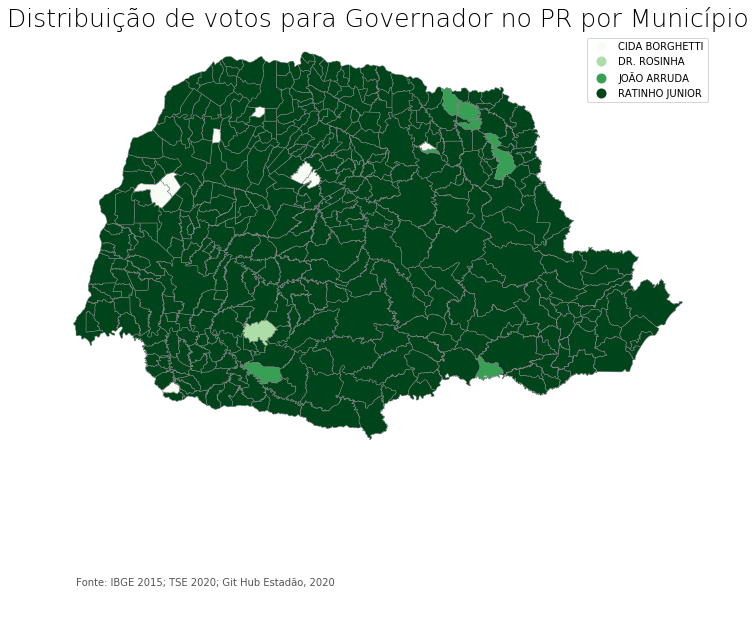

In [33]:
# Configurando o tamanho do mapa
fig, ax = plt.subplots(1, figsize=(12,12))

# Desenhar o mapa igual fizemos lá em cima
ax = df_pr_gov_map.plot(column='NR_CANDIDATO', legend=True, cmap="Greens", linewidth=0.5, ax=ax, edgecolor='gray')

# Não queremos as linhas que marcam os eixos x/y
ax.set_axis_off()

# Criando um título para o nosso mapa
ax.set_title("Distribuição de votos para Governador no PR por Município", fontdict={'fontsize':'25', 'fontweight': '3'})

# Criando uma nota de rodapé
ax.annotate("Fonte: IBGE 2015; TSE 2020; Git Hub Estadão, 2020", 
            xy=(0.1, 0.08), xycoords='figure fraction', horizontalalignment='left',
            verticalalignment='top', fontsize=10, color="#555555")

# Alterando a legenda para que apareça o nome do candidato e não o número
leg = ax.get_legend()
for i in range(len(leg.get_texts())):
    # Como temos 4 governadores no DataFrame, teremos 4 objetos representando as legendas
    # Precisamos filtrar cada objeto pois eles contem o número do candidato, e após buscar no nosso DataFrame
    # pelo número para extrair o nome
    leg.get_texts()[i].set_text(df_pr_gov_map[df_pr_gov_map['NR_CANDIDATO'] == leg.get_texts()[i].get_text()]['NM_URNA_CANDIDATO'].unique()[0])

# Plotando o mapa
plt.show()

E assim conseguimos plotar um mapa mostrando a distribuição de votos por cidade no estado do PR
Com algumas modificações podemos mostrar a distribuição pra qualquer estado brasileiro.

Os shapefile são muito grandes e por isso não serão enviados para o GIT mas você pode baixar no site do IBGE.

Segue fonte dos dados utilizados aqui:


[TSE Votação nominal por município e zona (formato ZIP)](http://agencia.tse.jus.br/estatistica/sead/odsele/votacao_candidato_munzona/votacao_candidato_munzona_2018.zip)

[IBGE ShapeFile do Pais, Estados e Cidades](https://mapas.ibge.gov.br/bases-e-referenciais/bases-cartograficas/malhas-digitais)

[DataSet Estadão fazendo correlações dos dados IBGE e TSE](https://github.com/estadao/como-votou-sua-vizinhanca/blob/master/data/votos/correspondencia-tse-ibge.csv])

[Dúvidas criticas sugestões?](https://www.linkedin.com/in/cesarvinici/) 


